# Time series: the weather in Göttingen from 1947 to 2015

*** Data: ***

The file ./data/produkt_klima_Tageswerte_19470101_20151231_01691.txt contains the daily measurements of the Göttingen weather station from 1947 untill 2015. It is just a plain text file, open it in a text editor to see how the data is organized.
This dataset along with many others can be downloaded from the FTP-server of the DWD (German Meteorological Office):
ftp://ftp-cdc.dwd.de/pub/CDC/

*** Preprocessing: ***
* Load the data with np.loadtxt. Hint: The first line is the header and the last column contains text. Use the parameters of np.loadtxt to exclude these. 
* For convenience, you can extract some interesting columns with slicing, e.g. MESS_DATUM (date), LUFTTEMPERATUR (air temperature), REL_FEUCHTE (humidity), NIEDERSCHLAGSHOEHE (precipitation), SONNENSCHEINDAUER (duration of sunshine), and store them in a 1d-array.
* Values of -999 indicate that there is no data available. This is annoying for many applications, e.g. if you compute the average or if you plot the data. Use a boolean index array to replace all -999 with the value np.nan ("nan" means not-a-number).

*** Analysis: ***

Here are some ideas:
* Plot some subsets of the data, e.g. the temperature of the last three years. Add some horizontal lines for the mean, min, and max values.
* Plot a histogram and a cumulative distribution of the temperature data. Mark the positions of the median, the mean, the upper and lower 20%-percentiles, ...
* Write a function which takes two arguments, a time series and a date, and returns the value of the time series on that specific day. 
* Challanging: Reshape the temperature time series into a two dimensional array such that its shape is 68 years x 365 days (before you do that you can use a boolean index array to remove the February 29th every four years). Then you can calculate the mean along one or the other axis to get a temperature profile of a year (averaged over all years) or the long-term trend of the temperature over 68 years, respectively. Both look even nicer if you do a moving average.

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

## Preprocessing

In [2]:
filename = './data/produkt_klima_Tageswerte_19470101_20151231_01691.txt'
data = np.loadtxt(filename, skiprows=1, delimiter=';', usecols=range(17))
shape = data.shape

In [3]:
#Extract some columns
date = data[:,1]
temperature = data[:,3]
humidity = data[:,7]
precipitation = data[:,13]
sunshine = data[:,15]

#Replace the -999 values by np.nan
sunshine[sunshine==-999] = np.nan
humidity[humidity==-999] = np.nan

## Analysis

### Visualization of the last three years

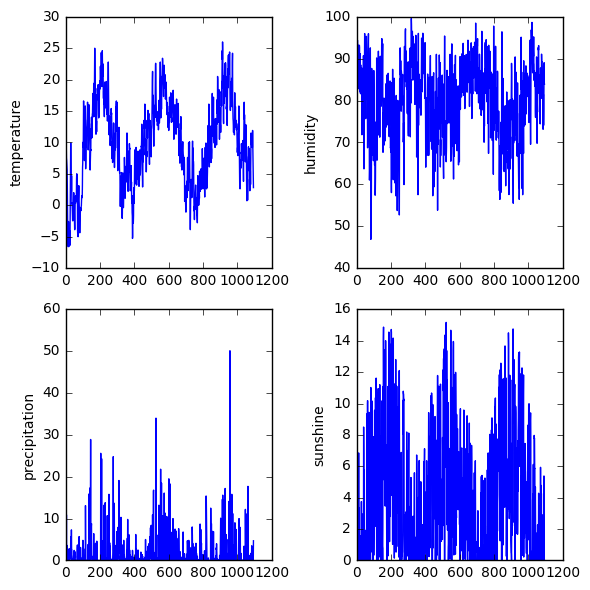

In [4]:
pl.figure(figsize=(6,6))

ndays = 365*3

pl.subplot(2,2,1)
pl.ylabel("temperature")
pl.plot(temperature[-ndays:])

pl.subplot(2,2,2)
pl.ylabel("humidity")
pl.plot(humidity[-ndays:])

pl.subplot(2,2,3)
pl.ylabel("precipitation")
pl.plot(precipitation[-ndays:])

pl.subplot(2,2,4)
pl.ylabel("sunshine")
pl.plot(sunshine[-ndays:])

pl.tight_layout()

### A function to extract a value on a specified date

In [5]:
def get_value(series, day):
    '''Get the value of a time series on a specific day.'''
    return series[np.argwhere(date==day)][0,0]

print("On January 26, 1994, python 1 was released and the temperature in Göttingen was {} °C.".format(get_value(temperature,19940126)))
print("On October 16, 2000, python 2 was released and the sun was shining for {} hours in Göttingen.".format(get_value(sunshine,20001016)))
print("On December 3, 2008, python 3 was released and it was raining {} mm in Göttingen.".format(get_value(precipitation,20081203)))


On January 26, 1994, python 1 was released and the temperature in Göttingen was 3.7 °C.
On October 16, 2000, python 2 was released and the sun was shining for 5.0 hours in Göttingen.
On December 3, 2008, python 3 was released and it was raining 3.2 mm in Göttingen.


### Histogram and cumulative distribution

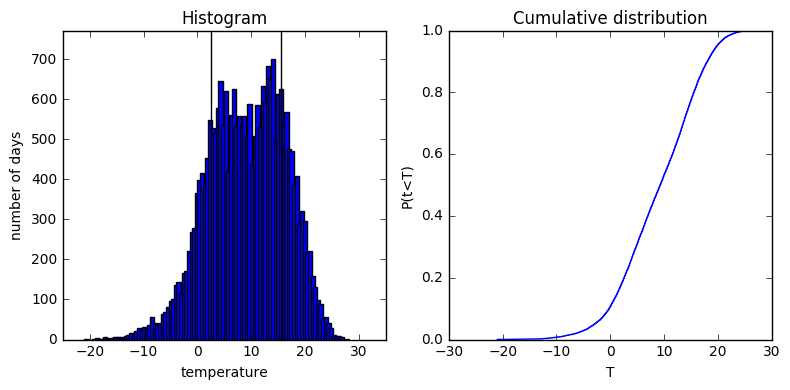

In [6]:
# Sort the temperature values to get lower and upper 20th percentile
temperature_sorted = np.sort(temperature)
t_lower_20th_percentile = temperature_sorted[int(0.2*len(temperature))]
t_upper_20th_percentile = temperature_sorted[int(0.8*len(temperature))]

# Compute histogram
hist, bin_edges = np.histogram(temperature, bins=100)

# Plot histogram
pl.figure(figsize=(8,4))
pl.subplot(1,2,1)
pl.bar(bin_edges[:-1], hist)
pl.vlines(t_lower_20th_percentile, 0, 1000)
pl.vlines(t_upper_20th_percentile, 0, 1000)
pl.ylim(0,1.1*np.max(hist))
pl.xlim(-25,35)
pl.title("Histogram")
pl.xlabel("temperature")
pl.ylabel("number of days")


# Plot cumulative distribution
pl.subplot(1,2,2)
pl.plot(temperature_sorted,np.linspace(0,1,len(temperature)))
pl.title("Cumulative distribution")
pl.xlabel("T")
pl.ylabel("P(t<T)")

# The following command automatically adjusts the space between subplots
pl.tight_layout()

In [7]:
# Remove all Feburary 29 to get years of equal length
index_array = np.array([str(int(d))[-4:]=='0229' for d in date])
print("List of leap days to be excluded:")
print(date[index_array])
temperature_without_leapdays = temperature[np.logical_not(index_array)]

# Now we can reshape it
temperature_reshaped = temperature_without_leapdays.reshape((-1,365))

List of leap days to be excluded:
[ 19480229.  19520229.  19560229.  19600229.  19640229.  19680229.
  19720229.  19760229.  19800229.  19840229.  19880229.  19920229.
  19960229.  20000229.  20040229.  20080229.  20120229.]


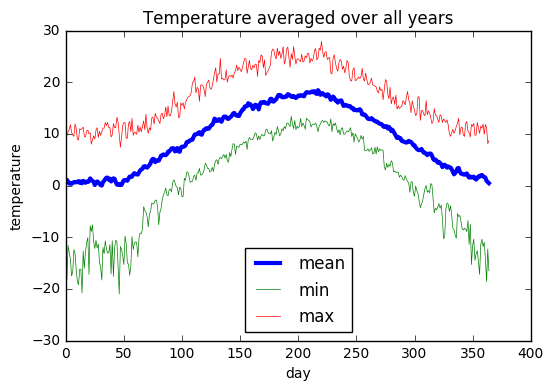

In [8]:
# By averaging over axis 0 we get a values for each day averaged over all years

pl.plot(np.mean(temperature_reshaped,axis=0), linewidth=3, label="mean")
pl.plot(np.min(temperature_reshaped,axis=0), linewidth=0.5, label="min")
pl.plot(np.max(temperature_reshaped,axis=0), linewidth=0.5, label="max")
pl.xlabel("day")
pl.ylabel("temperature")
pl.legend(loc='lower center')
pl.title("Temperature averaged over all years")

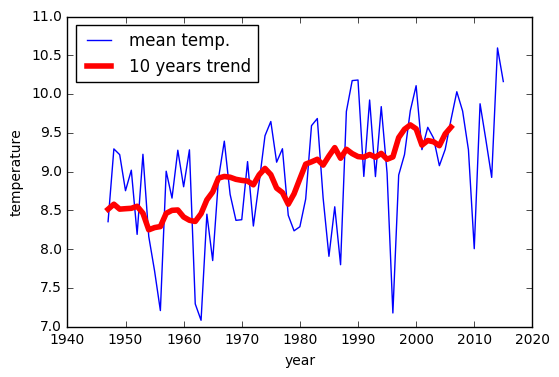

In [9]:
# By averaging over axis 1 we get a value for each year averaged over all days of that year
temp_trend = np.mean(temperature_reshaped,axis=1)

pl.plot(1947 + np.arange(len(temp_trend)), temp_trend, label='mean temp.')
pl.xlabel("year")
pl.ylabel("temperature")

# Moving average using a 10-years window
temp_trend_moving_average = np.convolve(temp_trend, np.ones(10), 'valid')/10.0
pl.plot(1947 + np.arange(len(temp_trend_moving_average)), temp_trend_moving_average, 'r-', linewidth=4, label='10 years trend')

pl.legend(loc='upper left')

 # Spatial data: The temperature field of germany 

The file ./data/TAMM_17_2015_01.asc (Source: ftp://ftp-cdc.dwd.de/pub/CDC/grids_germany/annual/air_temperature_mean/) contains the annual mean temperature of 2015 in germany on a 1km x 1km grid.



*** Preprocessing ***

* Use np.loadtxt to load the data. Hint: np.loadtxt has a parameter to skip the metadata in the first few lines. 
* The values -999 indicate that there is no data for this point, which is a problem e.g. when computing the average or the minimum value. Replace all -999 values by np.nan (nan: not-a-number). Hint: Either use np.where or flatten the array, use a boolean index array and then reshape it to the original shape.
* The temperature values in this dataset are given in units of 1/10 °C to avoid commas. Devide the data by 10 to get the real temperature. 

*** Visualization ***

* Use matplotlibs imshow-function to visualize the data. Try slicing the array to zoom in. 
* Mark the coldest place in germany with a blue dot and the hottest place with a red dot. Hint: np.nanargmin and np.nanargmax.
* Make a plot with two colors, one for all areas which are below the mean temperature and one for all areas which are above the mean temperature. Hint: Matplotlib can plot boolean arrays.
* Plot a temperature profile from north to south averaged over east to west. Hint: Use np.nanmean and the axis-parameter.

### Preprocessing

In [10]:
# Load the data
data = np.loadtxt("./data/TAMM_17_2015_01.asc", skiprows=6)
shape = data.shape

#The values -999 indicate that there is no data for this point. Lets replace them by np.nan (nan: not-a-number)
data_flat = data.flatten()
data_flat[data_flat==-999] = np.nan
data = data_flat.reshape(shape)
#data = np.where(data<-99,np.nan,data) #a shorter way to replace -999

#The temperature values in this dataset are given in units of 1/10 °C. Lets scale the values to °C:  
data = data / 10.0


### Visualization

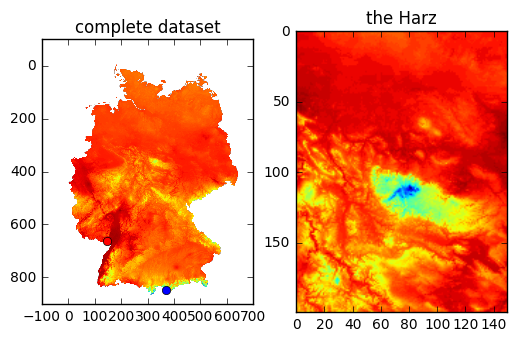

In [11]:
pl.subplot(1,2,1)

pl.title("complete dataset")
pl.imshow(data)

# Find index of coldest and hottest place
pos_max = np.unravel_index( np.nanargmax(data), data.shape)
pos_min = np.unravel_index( np.nanargmin(data), data.shape)
pl.plot(pos_max[1],pos_max[0],'ro')
pl.plot(pos_min[1],pos_min[0],'bo')

pl.subplot(1,2,2)
pl.imshow(data[250:450,250:400])
pl.title("the Harz")

/home/frank/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/frank/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


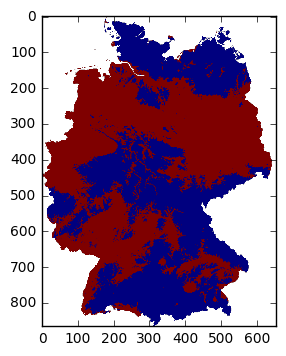

In [12]:
data2 = np.copy(data)
data2[data>np.nanmean(data)] = True
data2[data<np.nanmean(data)] = False
pl.imshow(data2)

/home/frank/.local/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


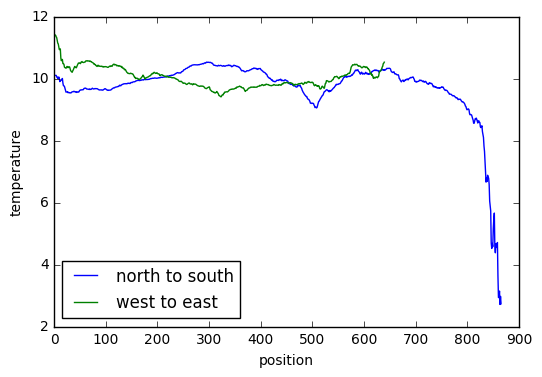

In [13]:
pl.plot(np.nanmean(data,axis=1),label='north to south')
pl.plot(np.nanmean(data,axis=0),label='west to east')
pl.legend(loc='lower left')
pl.ylabel("temperature")
pl.xlabel("position")